In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib as mpl
import matplotlib.cm as cm

Assessor Sales Data Preprocessing

Link to Dataset: https://datacatalog.cookcountyil.gov/Property-Taxation/Assessor-Archived-05-11-2022-Residential-Sales-Dat/5pge-nu6u

In [ ]:
def cast_address_format(address): 
    lst_address = address.split(' ')
    lst_address[0] = lst_address[0][0:-2]
    lst_address[0] = lst_address[0] + 'XX'
    return ' '.join(x for x in lst_address)

print(cast_address_format('10011 Wabash Ave'))

100XX Wabash Ave


In [ ]:
def assessor_df_cleaned(assessor_df):
    assessor_df = assessor_df[['Property Address','Sale Price']]
    assessor_df['Property Address'] = assessor_df['Property Address'].str.title()
    assessor_df['Property Address'] = assessor_df['Property Address'].astype(str)
    # assessor_df['Property Address'] = assessor_df['Property Address'].str.replace(r'\d{2}(?=\D*$)','XX')
    assessor_df['Property Address'] = assessor_df['Property Address'].apply(lambda x: cast_address_format(x))
    assessor_df['Address'] = assessor_df['Property Address']
    assessor_df = assessor_df.drop(columns=['Property Address'])
    assessor_df = assessor_df.groupby('Address')['Sale Price'].mean().reset_index()
    return assessor_df

In [ ]:
assessor_dir = '/content/drive/MyDrive/MATH 497 Subteam 3/Code Files & Github/Dataset/Assessor__Archived_05-11-2022__-_Residential_Sales_Data.csv' 
assessor_df = pd.read_csv(assessor_dir)
# assessor_df = assessor_df_cleaned(assessor_df)

In [ ]:
assessor_df.head(10)

,PIN,Property Class,Neighborhood Code,Land Square Feet,Town Code,Type of Residence,Apartments,Wall Material,Roof Material,Rooms,...,Age Decade Squared,Lot Size Squared,Improvement Size Squared,Pure Market Filter,Garage Indicator,Neigborhood Code (mapping),Square root of lot size,Square root of age,Square root of improvement size,Town and Neighborhood
0,17273100931118,299,40,365398.0,76,NaN,NaN,NaN,NaN,NaN,...,19.36,1.335157e+11,NaN,1,NaN,40,604.481596,6.633250,NaN,7640
1,18013090421010,299,52,19551.0,21,NaN,NaN,NaN,NaN,NaN,...,32.49,3.822416e+08,NaN,1,NaN,52,139.824890,7.549834,NaN,2152
2,16094150130000,211,13,4500.0,77,3.0,6.0,2.0,2.0,24.0,...,75.69,2.025000e+07,55279225.0,1,1.0,13,67.082039,9.327379,86.226446,7713
3,12253140491007,299,80,12148.0,20,NaN,NaN,NaN,NaN,NaN,...,6.76,1.475739e+08,NaN,1,NaN,80,110.217966,5.099020,NaN,2080
4,12111190201042,299,390,48470.0,71,NaN,NaN,NaN,NaN,NaN,...,20.25,2.349341e+09,NaN,1,NaN,390,220.159033,6.708204,NaN,71390
5,4252000820000,204,100,33898.0,25,5.0,0.0,2.0,4.0,11.0,...,37.21,1.149074e+09,22014864.0,1,1.0,100,184.114095,7.810250,68.498175,25100
6,3293400251060,299,72,21930.0,38,NaN,NaN,NaN,NaN,NaN,...,1.69,4.809249e+08,NaN,1,NaN,72,148.087812,3.605551,NaN,3872
7,13093160601015,299,402,8893.0,71,NaN,NaN,NaN,NaN,NaN,...,22.09,7.908545e+07,NaN,1,NaN,402,94.302704,6.855655,NaN,71402
8,14322110150000,208,12,3720.0,74,3.0,0.0,2.0,6.0,9.0,...,0.16,1.383840e+07,18378369.0,1,1.0,12,60.991803,2.000000,65.475186,7412
9,27021200080000,204,34,16079.0,28,1.0,0.0,3.0,1.0,7.0,...,8.41,2.585342e+08,4875264.0,1,1.0,34,126.802997,5.385165,46.989360,2834


Lead Water Concentration Data Preprocessing

In [ ]:
def df_cleaned(df):
    print(df.shape)
    df = df.drop(0) 
    df = df.drop("Index",axis=1)
    df['Date.Sampled'] = pd.to_datetime(df['Date.Sampled'])
    for i in range(3,len(col_name)):
        df[col_name[i]] = df[col_name[i]].apply(pd.to_numeric)
    df.drop(df.columns[[13,14,15,16,17,18]],axis=1,inplace=True) 
    col_new = df.columns
    draw_cols = col_new[2:]

    for i in range(len(draw_cols)):
        df = df[df[draw_cols[i]].notnull()]
    return df

In [ ]:
pd_dir = '/content/drive/MyDrive/MATH 497 Subteam 3/Code Files & Github/Dataset/497CleanedSequentialData.csv'
col_name = ['Index','Date.Sampled','Address','X1st.Draw','X2nd.Draw','X3rd.Draw','X4th.Draw','X5th.Draw','X6th.Draw','X7th.Draw','X8th.Draw','X9th.Draw','X10th.Draw','X11th.Draw','X3.Minute','X5.Minute','X7.Minute','X10.Minute','X15.Minute','X20.Minute']
df = pd.read_csv(pd_dir,names=col_name)

In [ ]:
df = df_cleaned(df) #before

(1809, 20)


In [ ]:
df[~df.isin(['NaN', 'NaT']).any(axis=1)]
df.shape
df.dropna(inplace=True)
df.shape

(1535, 13)

In [ ]:
df.shape #after

(1535, 13)

In [ ]:
df.isnull().sum(axis = 0)

Date.Sampled    0
Address         0
X1st.Draw       0
X2nd.Draw       0
X3rd.Draw       0
X4th.Draw       0
X5th.Draw       0
X6th.Draw       0
X7th.Draw       0
X8th.Draw       0
X9th.Draw       0
X10th.Draw      0
X11th.Draw      0
dtype: int64

In [ ]:
df.describe()

,X1st.Draw,X2nd.Draw,X3rd.Draw,X4th.Draw,X5th.Draw,X6th.Draw,X7th.Draw,X8th.Draw,X9th.Draw,X10th.Draw,X11th.Draw
count,1535.000000,1535.000000,1535.000000,1535.000000,1535.000000,1535.000000,1535.000000,1535.000000,1535.000000,1535.000000,1535.000000
mean,9.073397,9.691195,10.474641,10.791291,11.441878,12.062595,12.785183,13.574099,13.689857,13.529373,10.059421
std,19.051722,19.930587,17.054842,12.250770,12.025400,9.922047,10.080543,11.282248,10.392408,9.971626,9.039908
min,0.210000,0.200000,0.230000,0.220000,0.210000,0.230000,0.210000,0.220000,0.190000,0.240000,0.200000
25%,3.735000,4.360000,4.600000,4.800000,5.210000,5.575000,6.000000,6.400000,6.550000,6.580000,3.410000
50%,5.750000,6.640000,7.330000,7.800000,8.420000,9.530000,10.600000,11.400000,11.800000,11.700000,7.550000
75%,8.945000,10.100000,11.800000,12.600000,14.000000,15.400000,16.900000,17.800000,18.000000,18.000000,14.350000
max,355.000000,491.000000,420.000000,231.000000,267.000000,88.000000,99.600000,169.000000,101.000000,99.600000,89.400000


### Locating Address with the name "Carpenter"

In [ ]:
assessor_df[assessor_df["Address"] == '100XX S Bell Ave']

,Address,Sale Price
78,100XX S Bell Ave,299166.777778


In [ ]:
assessor_df

,Address,Sale Price
0,100XX 127Th St,250000.000000
1,100XX 145Th St,491000.000000
2,100XX 146Th St,447500.000000
3,100XX 147Th St,100880.600000
4,100XX 151St St,124400.250000
...,...,...
71977,XX Yates Ave,101352.400000
71978,XX Yorktown Ct,610000.000000
71979,XX Yosemite Ct,604625.000000
71980,XX Yost St,311750.250000


### Merging two DataFrames by using address 

In [ ]:
# df_new = pd.merge(df,assessor_df,on="Address",how='left')

In [ ]:
def joins(join):  
    df_new_inner = pd.merge(df,assessor_df,on="Address",how=join) #inner join
    df_new_inner.shape
    price_median = df_new_inner['Sale Price'].median()
    df_new_inner['Sale Price'] = df_new_inner['Sale Price'].fillna(price_median)
    df_new_inner = df_new_inner.drop_duplicates(subset='Address', keep="first")
    df_new_inner['Median Lead Draw'] = df_new_inner[col_name[3:14]].median(axis=1)
    df_new_inner = df_new_inner.drop(columns=col_name[3:14])
    df_new_inner = df_new_inner.drop_duplicates(subset='Address', keep="first")
    return df_new_inner

In [ ]:
df_new_inner = joins("inner")

In [ ]:
# price_median = df_new['Sale Price'].median()
# df_new['Sale Price'] = df_new['Sale Price'].fillna(price_median)
df_new_inner.shape

(907, 4)

In [ ]:
df_new_inner

,Date.Sampled,Address,Sale Price,Median Lead Draw
0,2019-09-04,100XX S Bell Ave,299166.777778,2.45
1,2016-07-16,100XX S Calhoun Ave,28977.714286,10.80
2,2019-12-17,100XX S Calumet Ave,59607.500000,11.10
3,2019-12-14,100XX S Carpenter St,64849.222222,7.31
4,2021-12-14,100XX S Lasalle St,16712.235294,9.50
...,...,...,...,...
965,2021-09-21,9XX N Fairfield Ave,312804.952381,13.90
966,2022-01-26,9XX W Gunnison St,217721.484848,9.40
967,2021-11-22,XX W 78Th St,98760.666667,17.20
968,2021-10-28,XX W 81St St,84167.666667,4.96


In [ ]:
len(df_new_inner.Address.unique())

907

In [ ]:
from scipy.stats import pearsonr

In [ ]:
df_left = joins("left")
df_right = joins("right")

In [ ]:
df_left.shape

(1386, 4)

In [ ]:
df_right.shape

(71982, 4)

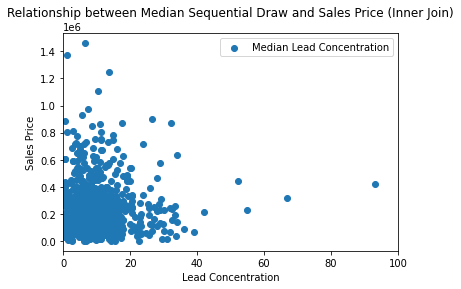

In [ ]:
fig,ax = plt.subplots()

ax.scatter(df_new_inner['Median Lead Draw'], df_new_inner['Sale Price'], label='Median Lead Concentration')


# ax.scatter(df_max['Max Lead Draw'],df_max['Sale Price'],label='Max Draw')
ax.set_xlabel('Lead Concentration')
ax.set_ylabel('Sales Price')
ax.set_title('Relationship between Median Sequential Draw and Sales Price (Inner Join)')
plt.xlim(0, 100)
# plt.ylim(0, 500000)
ax.legend()
plt.show()

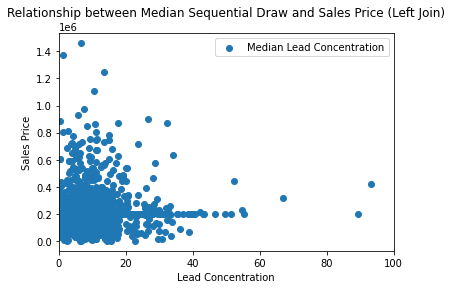

In [ ]:
fig,ax = plt.subplots()

ax.scatter(df_left['Median Lead Draw'], df_left['Sale Price'], label='Median Lead Concentration')


# ax.scatter(df_max['Max Lead Draw'],df_max['Sale Price'],label='Max Draw')
ax.set_xlabel('Lead Concentration')
ax.set_ylabel('Sales Price')
ax.set_title('Relationship between Median Sequential Draw and Sales Price (Left Join)')
plt.xlim(0, 100)
# plt.ylim(0, 500000)
ax.legend()
plt.show()

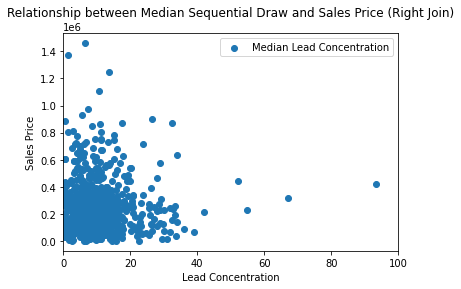

In [ ]:
fig,ax = plt.subplots()

ax.scatter(df_right['Median Lead Draw'], df_right['Sale Price'], label='Median Lead Concentration')


# ax.scatter(df_max['Max Lead Draw'],df_max['Sale Price'],label='Max Draw')
ax.set_xlabel('Lead Concentration')
ax.set_ylabel('Sales Price')
ax.set_title('Relationship between Median Sequential Draw and Sales Price (Right Join)')
plt.xlim(0, 100)
# plt.ylim(0, 500000)
ax.legend()
plt.show()

List Slicing

In [ ]:
draw_df = df.iloc[:,2:].values

In [ ]:
draw_df = np.array(draw_df)

In [ ]:
draw_df[:,0] #draw 1 values (col)

array([ 1.52,  3.7 ,  4.02, ..., 11.  ,  4.41,  5.79])

In [ ]:
draw_df[0,:] #1 sequential data sample (row)

array([1.52, 1.37, 1.59, 2.53, 2.44, 1.9 , 2.45, 2.92, 3.75, 3.86, 4.35])

In [ ]:
!sudo apt-get install texlive-xetex texlive-fonts-recommended

In [ ]:
!jupyter nbconvert --to pdf '/content/drive/MyDrive/MATH 497 Subteam 3/sequential_data&CCAO.ipynb'